Importing the Modules

In [1]:
import numpy as np
import seaborn as snns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
type(y_train)

numpy.ndarray

In [5]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [6]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


Training data=60,000 Images

Test data=10,000 Image




In [7]:
# pinting the 20th image
print(x_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [9]:
print(x_train[20].shape)

(28, 28)


all the images have the same dimentions if not use resize() to make all images to same dimentions

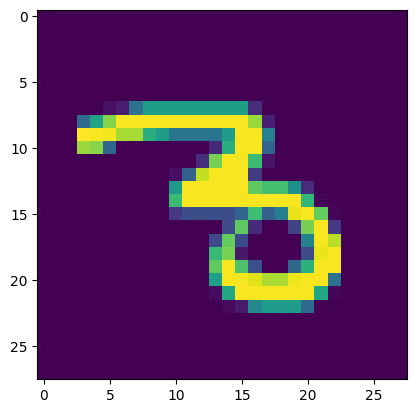

9


In [8]:
#diaplaying the image
plt.imshow(x_train[30])
plt.show()
print(y_train[45])

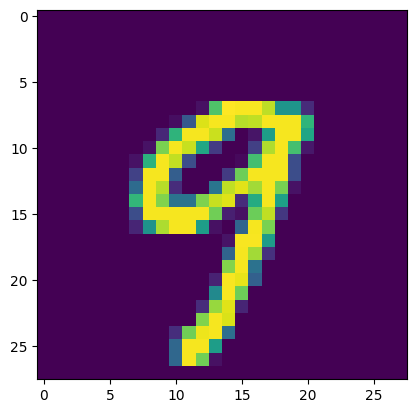

9


In [10]:
plt.imshow(x_train[45])
plt.show()
print(y_train[45])

In [11]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [12]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [13]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


Scaling the values

In [14]:
x_train=x_train/255

In [15]:
y_train=y_train/255

In [16]:
print(x_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

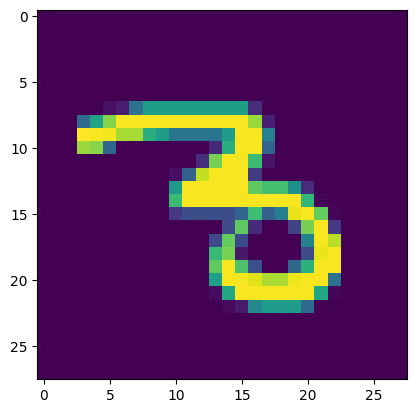

0.03529411764705882


In [17]:

plt.imshow(x_train[30])
plt.show()
print(y_train[45])

Building the Neutral Networks

In [18]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation="relu"),
                        keras.layers.Dense(50,activation="relu"),
                        keras.layers.Dense(10,activation="sigmoid")
                        ])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [21]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0118 - accuracy: 0.0986
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3775e-06 - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1568e-07 - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.3608e-08 - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1315e-08 - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1025e-08 - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.0948e-09 - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5895e-09 - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.8347e-10 - accuracy: 0.0987
Epoch 10/10
1875/1875 [===========================

Training data accuracy=98.9%

Accuracy on Test data:

In [22]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 11167.3115 - accuracy: 0.0980


Test data accuracy=98.0%

In [23]:
print(x_test.shape)

(10000, 28, 28)


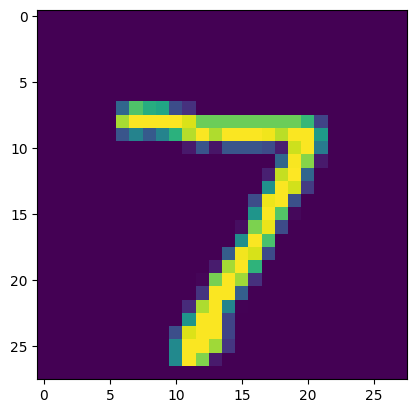

In [40]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [39]:
print(y_test[0])

7


In [26]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
print(y_pred.shape)

(10000, 10)


In [29]:
print(y_pred[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


model.predict() gives the prediction of each class forthat data point

In [30]:
#convert the prediction probabilities to class label

In [31]:
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

0


In [34]:
#convert the prediction probabilities to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [35]:
print(y_pred)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Confusion Matrix

In [36]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

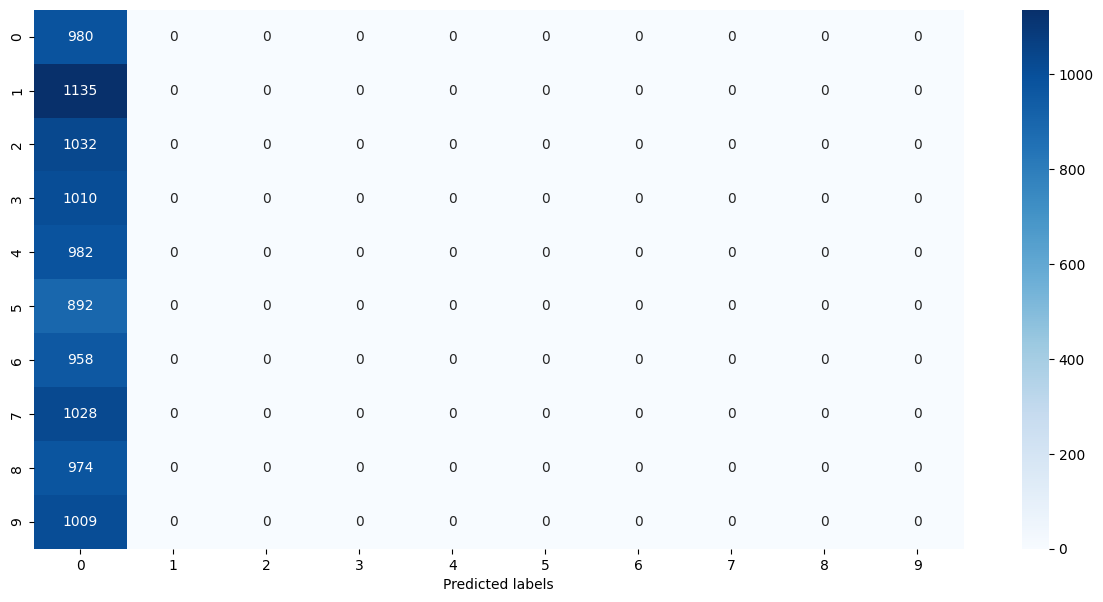

In [38]:
plt.figure(figsize=(15,7))
snns.heatmap(conf_mat,annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted labels")